Chapter 03

# 用热图可视化矩阵乘法第三视角
《线性代数》 | 鸢尾花书：数学不难

这段代码的主要目的是进行随机矩阵的生成、矩阵乘法运算，并通过热力图（heatmap）进行可视化展示。我们将从数学角度详细分析代码的操作过程，并提供相关的数学公式。

---

### **1. 矩阵初始化**
代码首先导入 `numpy` 进行数值计算，`seaborn` 用于可视化矩阵，`matplotlib.pyplot` 用于绘图。

定义矩阵 $A$ 和 $B$：
- $A$ 是一个 $5 \times 12$ 维的随机矩阵，元素从均匀分布 $U(-1,1)$ 采样：
  $$
  A = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1,12} \\ a_{21} & a_{22} & \cdots & a_{2,12} \\ \vdots & \vdots & \ddots & \vdots \\ a_{51} & a_{52} & \cdots & a_{5,12} \end{bmatrix}, \quad a_{ij} \sim U(-1,1)
  $$
- $B$ 是一个 $12 \times 8$ 维的随机矩阵，元素同样从 $U(-1,1)$ 采样：
  $$
  B = \begin{bmatrix} b_{11} & b_{12} & \cdots & b_{1,8} \\ b_{21} & b_{22} & \cdots & b_{2,8} \\ \vdots & \vdots & \ddots & \vdots \\ b_{12,1} & b_{12,2} & \cdots & b_{12,8} \end{bmatrix}, \quad b_{ij} \sim U(-1,1)
  $$

随后，使用 `seaborn.heatmap()` 可视化 $A$ 和 $B$，热力图能够直观地显示矩阵中各元素的数值分布。

---

### **2. 计算矩阵乘法 $C = A B$**
矩阵乘法的定义：
$$
C = A B
$$
其中：
- $A$ 的形状为 $(5,12)$
- $B$ 的形状为 $(12,8)$
- 结果 $C$ 的形状为 $(5,8)$

矩阵 $C$ 的元素计算如下：
$$
c_{ij} = \sum_{k=1}^{12} a_{ik} b_{kj}
$$
即：
$$
C = \begin{bmatrix} c_{11} & c_{12} & \cdots & c_{18} \\ c_{21} & c_{22} & \cdots & c_{28} \\ \vdots & \vdots & \ddots & \vdots \\ c_{51} & c_{52} & \cdots & c_{58} \end{bmatrix}
$$
其中：
$$
c_{ij} = a_{i1} b_{1j} + a_{i2} b_{2j} + \dots + a_{i,12} b_{12,j}
$$

---

### **3. 矩阵 $C$ 的可视化**
代码计算 $C$ 的最大值和最小值：
```python
C.max()
C.min()
```
然后，使用 `seaborn.heatmap()` 绘制 $C$ 的热力图，并通过 `vmin=C.min(), vmax=C.max()` 设置颜色范围，使颜色映射能直观地体现数值的相对大小。

接着，代码通过 `plt.subplots()` 组合可视化：
- `C` 的热力图
- `A` 的热力图
- `B` 的热力图
- 以及符号 "=" 和 "@" 用于直观表示矩阵乘法 $C = A B$

---

### **4. 按列计算 $C$ 的每一列**
由于 $C$ 由 $A$ 和 $B$ 的列向量计算得到，我们可以将其按列拆分，逐列计算：
$$
C_j = A \cdot B_{[:, j]}
$$
其中 $B_{[:, j]}$ 代表矩阵 $B$ 的第 $j$ 列，形状为 $(12,1)$，所以矩阵乘法 $A B_{[:, j]}$ 产生一个 $(5,1)$ 形状的列向量：
$$
c_j = \begin{bmatrix} c_{1j} \\ c_{2j} \\ c_{3j} \\ c_{4j} \\ c_{5j} \end{bmatrix}
$$
即：
$$
c_j = A \cdot \begin{bmatrix} b_{1j} \\ b_{2j} \\ \vdots \\ b_{12,j} \end{bmatrix} = \begin{bmatrix} \sum_{k=1}^{12} a_{1k} b_{kj} \\ \sum_{k=1}^{12} a_{2k} b_{kj} \\ \vdots \\ \sum_{k=1}^{12} a_{5k} b_{kj} \end{bmatrix}
$$

代码使用 `plt.subplots()` 生成多个子图，并在循环 `for j in range(n):` 中计算 $C_j$ 并绘制热力图，直观展示矩阵乘法如何通过 $B$ 的列向量逐列计算得到 $C$。

---

### **5. 结论**
这段代码通过：
1. **随机生成矩阵 $A$ 和 $B$**，并可视化它们的数值分布。
2. **计算矩阵乘法 $C = A B$**，并解析矩阵乘法的计算过程。
3. **绘制 $C$ 的热力图**，与 $A$ 和 $B$ 进行对比，直观展示矩阵乘法的结果。
4. **逐列计算 $C$**，解释矩阵乘法如何通过列向量形式拆解进行计算。

矩阵 $C$ 的结构反映了 $A$ 的行向量与 $B$ 的列向量的线性组合，这种计算方式在信号处理、深度学习（如全连接层的计算）、数据压缩（如奇异值分解 SVD）、物理模拟等领域广泛应用。

## 初始化

In [4]:
import numpy as np  # 导入数值计算库
import seaborn as sns  # 导入数据可视化库
from matplotlib import pyplot as plt  # 导入绘图库

## 创建矩阵A和B

In [6]:
np.random.seed(88)  # 保证每次运行生成相同的随机数
A = np.random.uniform(-1, 1, (5, 12))
# 生成一个 5×12 的随机整数矩阵（数值范围 0~10）
A

array([[ 0.2951021 ,  0.01429938,  0.05668276,  0.79257041,  0.39998238,
         0.4285942 ,  0.43467676, -0.55436108, -0.64969095, -0.08631702,
         0.85747686, -0.98022823],
       [-0.82015561,  0.70040054, -0.02875788,  0.75367118, -0.38533212,
        -0.22406891,  0.16289149, -0.77262564,  0.53576037, -0.37486792,
         0.29202092, -0.93460217],
       [-0.66720885, -0.13939394, -0.54438706,  0.93261493,  0.80987882,
         0.73132583, -0.93567444,  0.5989955 ,  0.81231102,  0.40786666,
        -0.54057511, -0.1771288 ],
       [ 0.95728792, -0.34190808,  0.19105814,  0.07169268, -0.07780809,
        -0.54840068,  0.84110593,  0.22164568, -0.55981616, -0.9214308 ,
         0.09577916, -0.81962657],
       [ 0.63613656,  0.36713916,  0.87165598, -0.82017787, -0.97328478,
        -0.56777511, -0.23258517,  0.47506735, -0.48989147, -0.48920298,
        -0.52213956, -0.78695798]])

<Axes: >

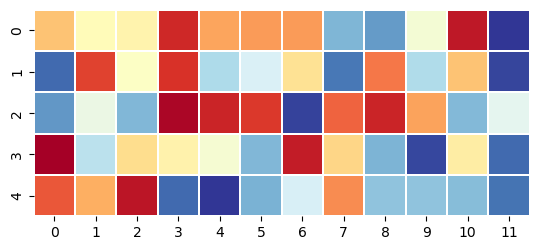

In [7]:
sns.heatmap(A, cmap = 'RdYlBu_r', square = True, 
            cbar = False,
            linecolor = 'w', linewidths = 0.25)

In [8]:
B =  np.random.uniform(-1, 1, (12, 8))
# 生成一个 5×12 的随机整数矩阵（数值范围 0~10）
B

array([[-0.63544881,  0.78586467, -0.8805252 , -0.66807296, -0.92597501,
         0.40170689,  0.99329933, -0.77794562],
       [ 0.44911418, -0.32517321, -0.6463447 ,  0.88373575,  0.95186898,
         0.52953172, -0.19490997, -0.16397646],
       [ 0.28995495, -0.92863205, -0.73063709,  0.26954949,  0.86110223,
         0.90084512,  0.12667943, -0.57593776],
       [ 0.0818441 , -0.65333352, -0.70500183,  0.45299007, -0.58046341,
        -0.95581985,  0.25193687,  0.90186504],
       [ 0.78719916, -0.26147268,  0.85737295,  0.02976143,  0.88742041,
         0.13894219, -0.97340213, -0.32344632],
       [-0.76270929, -0.31874168, -0.27196198,  0.30947122,  0.87200487,
        -0.60105042,  0.24760211, -0.68565583],
       [-0.8348775 ,  0.38619428, -0.45257766, -0.19015451,  0.99434971,
         0.0082224 ,  0.87605771, -0.28638224],
       [-0.40400711, -0.7689096 , -0.09600042,  0.95586342, -0.06598517,
        -0.93511531,  0.31161634, -0.94289277],
       [-0.39658628,  0.95619366

<Axes: >

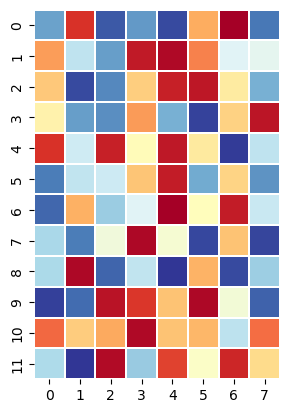

In [9]:
sns.heatmap(B, cmap = 'RdYlBu_r', square = True, 
            cbar = False,
            linecolor = 'w', linewidths = 0.25)

## 矩阵乘法 A@B

In [11]:
C = A @ B
C

array([[ 0.98797093,  0.66910163, -0.88876459,  1.12118591,  0.69130305,
        -0.25055795, -0.06932378,  1.08696502],
       [ 1.61749156,  1.31993114, -2.06638394,  0.89880038, -0.60852435,
         0.072751  , -1.89227367,  2.23129511],
       [-0.07813197, -1.37788175,  0.57851779,  1.23120289, -1.1172428 ,
        -2.11212281, -2.4691439 , -0.4314863 ],
       [ 0.34710126,  2.04869843, -2.23427683, -1.05088561, -1.11971085,
        -0.61067229,  1.68173533,  0.13102407],
       [ 0.2644065 ,  0.65919255, -2.46419918, -0.30393328, -1.04122842,
         0.96055876,  1.22317478, -1.31792664]])

In [12]:
C.max()

2.23129510882643

In [13]:
C.min()

-2.4691438978737184

Text(0.5, 1.0, 'B')

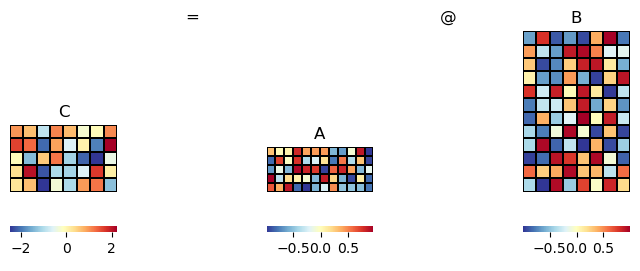

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(8, 3))  

plt.sca(axs[0])
ax = sns.heatmap(C, cmap='RdYlBu_r', 
                 linecolor = 'k', linewidths = '0.25',
                 vmin = C.min(), vmax = C.max(),
                 xticklabels = [], yticklabels = [],
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('C')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(A, cmap='RdYlBu_r', 
                 linecolor = 'k', linewidths = '0.25',
                 xticklabels = [], yticklabels = [],
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('A')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(B, cmap='RdYlBu_r', 
                 linecolor = 'k', linewidths = '0.25',
                 xticklabels = [], yticklabels = [],
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('B')

## 左右排列

In [16]:
B_shape = B.shape
B_shape

(12, 8)

In [17]:
n = B_shape[1]
n

8

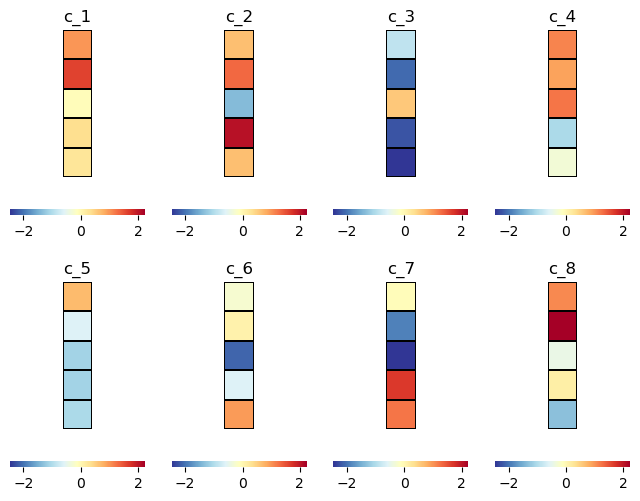

In [18]:
fig, axs = plt.subplots(2, 4, figsize=(8, 6))  
axs = axs.flatten()

for j in range(n):
    C_j = A @ B [:,[j]]

    plt.sca(axs[j])
    ax = sns.heatmap(C_j, cmap='RdYlBu_r', 
                     linecolor = 'k', linewidths = '0.25',
                     vmin = C.min(), vmax = C.max(),
                     xticklabels = [], yticklabels = [],
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.title('c_' + str(j + 1))


作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  